In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('Tweets.csv')

In [3]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2020-11-05 23:34:24+00:00,1.324500e+18,"Pakistani Army Extracts From Its Own Farmers, ...",HindiNewsLates1
1,2020-11-05 22:09:16+00:00,1.324470e+18,{editor} Non-stun export ban sparks mass farme...,ukagri
2,2020-11-05 21:57:50+00:00,1.324470e+18,PTI itself kept Islamabad hijacked for months ...,Gulalai_Ismail
3,2020-11-05 21:54:22+00:00,1.324470e+18,Malik Ishfaq Langrial passes away after Punjab...,AanuJanu1
4,2020-11-05 21:30:24+00:00,1.324460e+18,"Farmers postpone protest after baton-charge, a...",RelationsState


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17165 entries, 0 to 17164
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  17165 non-null  object 
 1   Tweet Id  17165 non-null  float64
 2   Text      17165 non-null  object 
 3   Username  17165 non-null  object 
dtypes: float64(1), object(3)
memory usage: 536.5+ KB


In [5]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')

In [6]:
text_df=df.drop(['Datetime', 'Tweet Id', 'Username'],axis=1)
text_df.head()

,Text
0,"Pakistani Army Extracts From Its Own Farmers, ..."
1,{editor} Non-stun export ban sparks mass farme...
2,PTI itself kept Islamabad hijacked for months ...
3,Malik Ishfaq Langrial passes away after Punjab...
4,"Farmers postpone protest after baton-charge, a..."


In [7]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

Pakistani Army Extracts From Its Own Farmers, Farmers Protest, Then Showers Bullets ANN https://t.co/VZ8XWm81yd 

{editor} Non-stun export ban sparks mass farmer protests across Poland https://t.co/NmldFUH7iN 

PTI itself kept Islamabad hijacked for months in attempt to throw the democratic government of PML-N but can’t bear protest of rights groups. It’s administration used baton  charge, tear gas and chemical laden water against protesting farmers which killed Ashfaq Langriyal. https://t.co/CHTt9x6avI 

Malik Ishfaq Langrial passes away after Punjab Police torture. He sustained injuries yesterday during protest in Lahore demanding farmers' rights https://t.co/Vp8IqcLrGY 

Farmers postpone protest after baton-charge, arrests – Pakistan https://t.co/hbLU5wFpY0 



In [8]:
def data_processing(Text):
    Text = Text.lower()
    Text= re.sub(r"https\S+|www\S+https\S+", '',Text, flags=re.MULTILINE)
    Text= re.sub(r'[^\w\s]','',Text)
    Text= re.sub(r'\@w+|\#','',Text)
    text_tokens = word_tokenize(Text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [9]:
text_df.Text = text_df['Text'].apply(data_processing)

In [10]:
text_df.head()

,Text
0,pakistani army extracts farmers farmers protes...
1,editor nonstun export ban sparks mass farmer p...
2,pti kept islamabad hijacked months attempt thr...
3,malik ishfaq langrial passes away punjab polic...
4,farmers postpone protest batoncharge arrests p...


In [11]:
stemmer = PorterStemmer()
def stemming(data):
    Text= [stemmer.stem(word) for word in data]
    return data


In [12]:
text_df['Text']= text_df['Text'].apply(lambda x : stemming(x))

In [13]:
text_df.head()

,Text
0,pakistani army extracts farmers farmers protes...
1,editor nonstun export ban sparks mass farmer p...
2,pti kept islamabad hijacked months attempt thr...
3,malik ishfaq langrial passes away punjab polic...
4,farmers postpone protest batoncharge arrests p...


In [14]:
print(text_df['Text'].iloc[0],"\n")
print(text_df['Text'].iloc[1],"\n")
print(text_df['Text'].iloc[2],"\n")
print(text_df['Text'].iloc[3],"\n")
print(text_df['Text'].iloc[4],"\n")

pakistani army extracts farmers farmers protest showers bullets ann 

editor nonstun export ban sparks mass farmer protests across poland 

pti kept islamabad hijacked months attempt throw democratic government pmln cant bear protest rights groups administration used baton charge tear gas chemical laden water protesting farmers killed ashfaq langriyal 

malik ishfaq langrial passes away punjab police torture sustained injuries yesterday protest lahore demanding farmers rights 

farmers postpone protest batoncharge arrests pakistan 



In [15]:
def polarity(Text):
    return TextBlob(Text).sentiment.polarity
    

In [16]:
text_df['polarity']= text_df['Text'].apply(polarity)

In [17]:
text_df.head()

,Text,polarity
0,pakistani army extracts farmers farmers protes...,0.0
1,editor nonstun export ban sparks mass farmer p...,0.0
2,pti kept islamabad hijacked months attempt thr...,-0.2
3,malik ishfaq langrial passes away punjab polic...,0.0
4,farmers postpone protest batoncharge arrests p...,0.0


In [18]:
def sentiment(polarity):
    if polarity < 0 :
        return "Negetive"
    elif polarity == 0:
        return "Neutral"
    else :
        return "Positive"

In [19]:
text_df['Sentiment'] = text_df['polarity'].apply(sentiment)

In [20]:
text_df.head()

,Text,polarity,Sentiment
0,pakistani army extracts farmers farmers protes...,0.0,Neutral
1,editor nonstun export ban sparks mass farmer p...,0.0,Neutral
2,pti kept islamabad hijacked months attempt thr...,-0.2,Negetive
3,malik ishfaq langrial passes away punjab polic...,0.0,Neutral
4,farmers postpone protest batoncharge arrests p...,0.0,Neutral


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

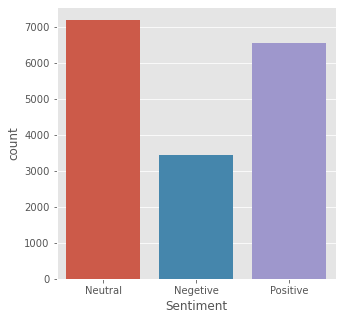

In [21]:
fig= plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment', data= text_df)

In [22]:
pos_tweet = text_df[text_df.Sentiment == 'Positive']
pos_tweet = pos_tweet.sort_values(['polarity'], ascending = False)
pos_tweet.head()

,Text,polarity,Sentiment
3457,anuragsingh_as excellent thread called farmers...,1.0,Positive
11103,2021 republic day best way show patriotism wat...,1.0,Positive
7835,evidence narendramodi best pm india ever wione...,1.0,Positive
13905,biggest andolan history handled best way farme...,1.0,Positive
9193,shubhampandeyj narendramodi best picture 2021 ...,1.0,Positive


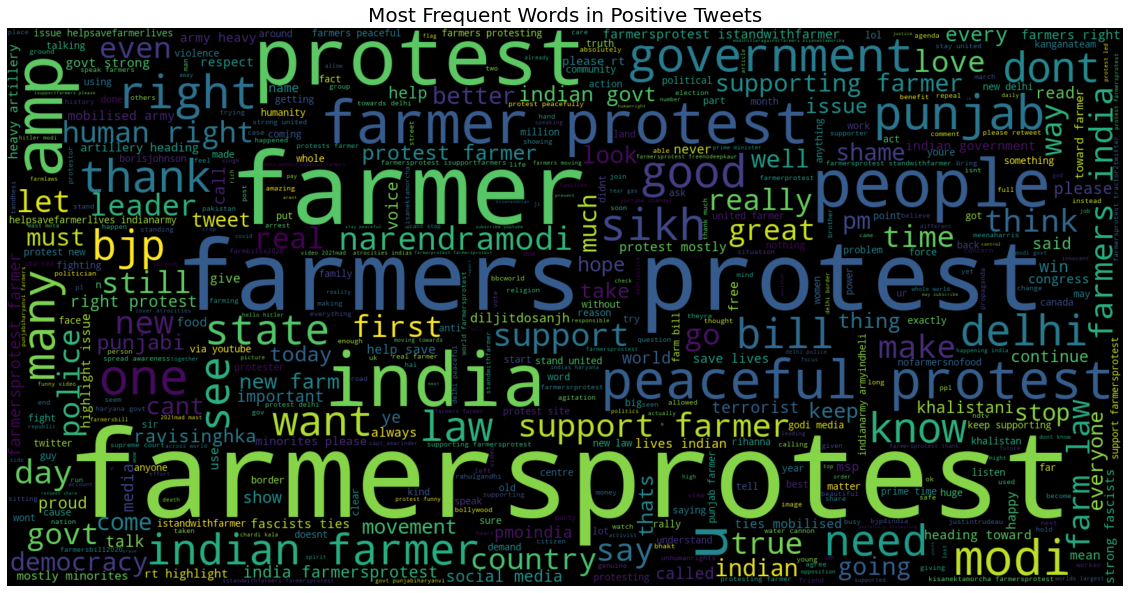

In [23]:
Text = " ".join([word for word in pos_tweet['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width =1600, height=800).generate(Text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Positive Tweets', fontsize= 20)
plt.show()

In [24]:
neg_tweet = text_df[text_df.Sentiment == 'Negetive']
neg_tweet = pos_tweet.sort_values(['polarity'])
neg_tweet.head()

,Text,polarity,Sentiment
2070,organizers historic general strike said arrest...,4.625929e-18,Positive
2772,amaanbali also bot khalistanis using farmers p...,6.938894e-18,Positive
14562,situation volatile amp tenuous would advise de...,6.938894e-18,Positive
8217,congress communist party propaganda clearly vi...,6.938894e-18,Positive
3138,_indianofficial brother common people really c...,9.251859e-18,Positive


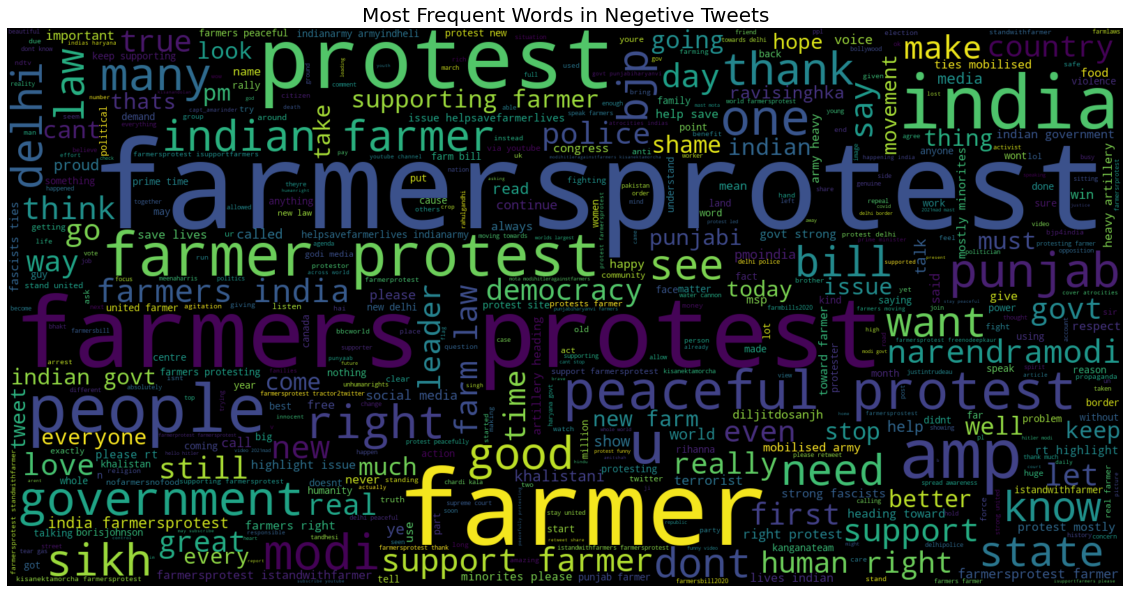

In [25]:
Text = " ".join([word for word in neg_tweet['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width =1600, height=800).generate(Text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Negetive Tweets', fontsize= 20)
plt.show()

In [26]:
import warnings 
warnings.filterwarnings('ignore')

In [27]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Text'])

In [28]:
feature_names = vect.get_feature_names()
print("Number of features : {}\n".format(len(feature_names)))
print("First 20 Features : \n {}".format(feature_names[:20]))

Number of features : 195479

First 20 Features : 
 ['000', '000 acres', '00001they', '00001they get', '000hw', '000hw ravisinghka', '006', '006 affected', '01022012', '01022012 via', '02058', '02058 booked', '02130news', '02130news news4romania', '0230', '0230 pm', '025', '025 billion', '03', '03 laws']


In [29]:
X = text_df['Text']
Y = text_df['Sentiment']
X = vect.transform(X)

In [30]:
x_train ,x_test ,y_train ,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print("Size of x_train:",(x_train.shape))
print("Size of y_train:",(y_train.shape))
print("Size of x_test:",(x_test.shape))
print("Size of y_test:",(y_test.shape))

Size of x_train: (13732, 195479)
Size of y_train: (13732,)
Size of x_test: (3433, 195479)
Size of y_test: (3433,)


In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.27%


In [33]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 407  189   75]
 [  17 1357   33]
 [  47  179 1129]]


              precision    recall  f1-score   support

    Negetive       0.86      0.61      0.71       671
     Neutral       0.79      0.96      0.87      1407
    Positive       0.91      0.83      0.87      1355

    accuracy                           0.84      3433
   macro avg       0.85      0.80      0.82      3433
weighted avg       0.85      0.84      0.84      3433



In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

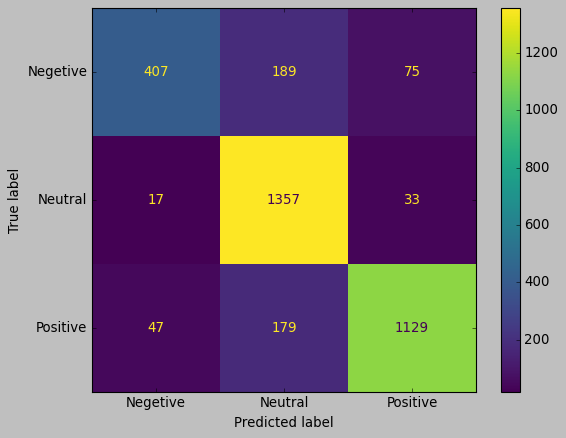

In [35]:
style.use('classic')
cm= confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= logreg.classes_)
disp.plot()

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [39]:
print("Best Parameter :", grid.best_params_)

Best Parameter : {'C': 10}


In [40]:
y_pred = grid.predict(x_test)

In [41]:
logreg_acc = accuracy_score(y_pred, y_test)
print('Test Accuracy : {:.2f}%'.format(logreg_acc*100))

Test Accuracy : 85.14%


In [43]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 421  176   74]
 [  15 1360   32]
 [  43  170 1142]]


              precision    recall  f1-score   support

    Negetive       0.88      0.63      0.73       671
     Neutral       0.80      0.97      0.87      1407
    Positive       0.92      0.84      0.88      1355

    accuracy                           0.85      3433
   macro avg       0.86      0.81      0.83      3433
weighted avg       0.86      0.85      0.85      3433



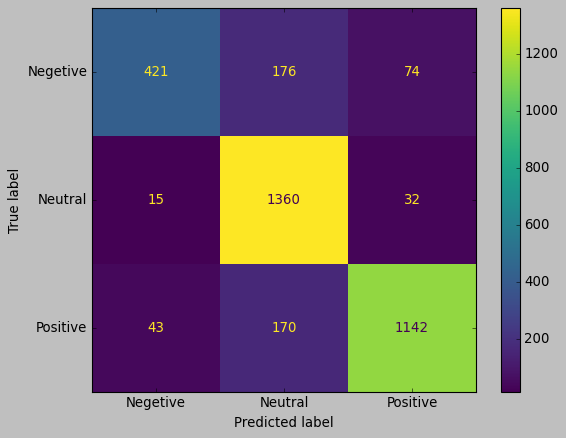

In [44]:
style.use('classic')
cm= confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= logreg.classes_)
disp.plot()